# Цель работы: 
Применить библиотеку sсikit-learn для построения простой модели классификации по методу k-ближайших средних. Изучить полученные данные, научиться оценивать качество моделей.

Пострение модели по раку груди висконсин (диагностический)

In [69]:
from sklearn.datasets import load_breast_cancer
breast_cancer_dataset = load_breast_cancer();

In [70]:
#Выведем наши ключи breast_cancer_dataset:

print("Ключи breast_cancer_dataset: \n{}".format(breast_cancer_dataset.keys()))

Ключи breast_cancer_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [71]:
print(breast_cancer_dataset["DESCR"][:1000] + "\n...")
#краткое описание набора данных:

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [72]:
print("Название ответов: {}".format(breast_cancer_dataset['target_names']))
#Классы по которым разделены:

Название ответов: ['malignant' 'benign']


In [73]:
print("Название признаков: \n{}".format(breast_cancer_dataset['feature_names']))

Название признаков: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [74]:
print("Тип массива data: {}".format(type(breast_cancer_dataset['data'])))

Тип массива data: <class 'numpy.ndarray'>


In [75]:
print("Форма массива data: {}".format(breast_cancer_dataset['data'].shape))

Форма массива data: (569, 30)


In [76]:
import pandas as pd

df = pd.DataFrame(breast_cancer_dataset['data'][:5])
print("Название признаков: \n{}".format(breast_cancer_dataset['feature_names']))
print(df)
#Ниже приведены значения признаков для первых пяти примеров:

Название признаков: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
      0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0

In [77]:
print("Тип массива target: {}".format(type(breast_cancer_dataset['target'])))

Тип массива target: <class 'numpy.ndarray'>


In [78]:
print("Форма массива target: {}".format(breast_cancer_dataset['target'].shape))

Форма массива target: (569,)


In [79]:
print("Ответы: \n{}".format(breast_cancer_dataset['target']))
#Сорта кодируются как целые числа от 0 до 1:

Ответы: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1

## Метрики эффективности: обучающий и тестовые наборы

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_dataset['data'], breast_cancer_dataset['target'], random_state=0)

Эта функция отбирает в обучающий набор 75% строк данных с соответствующими метками. Оставшиеся 25% данных с метками объявляются тестовым набором. 

In [81]:
print("Форма массива X_train: {}".format(X_train.shape))
print("Форма массива y_train: {}".format(y_train.shape))

Форма массива X_train: (426, 30)
Форма массива y_train: (426,)


In [82]:
print("Форма массива X_test: {}".format(X_test.shape))
print("Форма массива y_test: {}".format(y_test.shape))

Форма массива X_test: (143, 30)
Форма массива y_test: (143,)


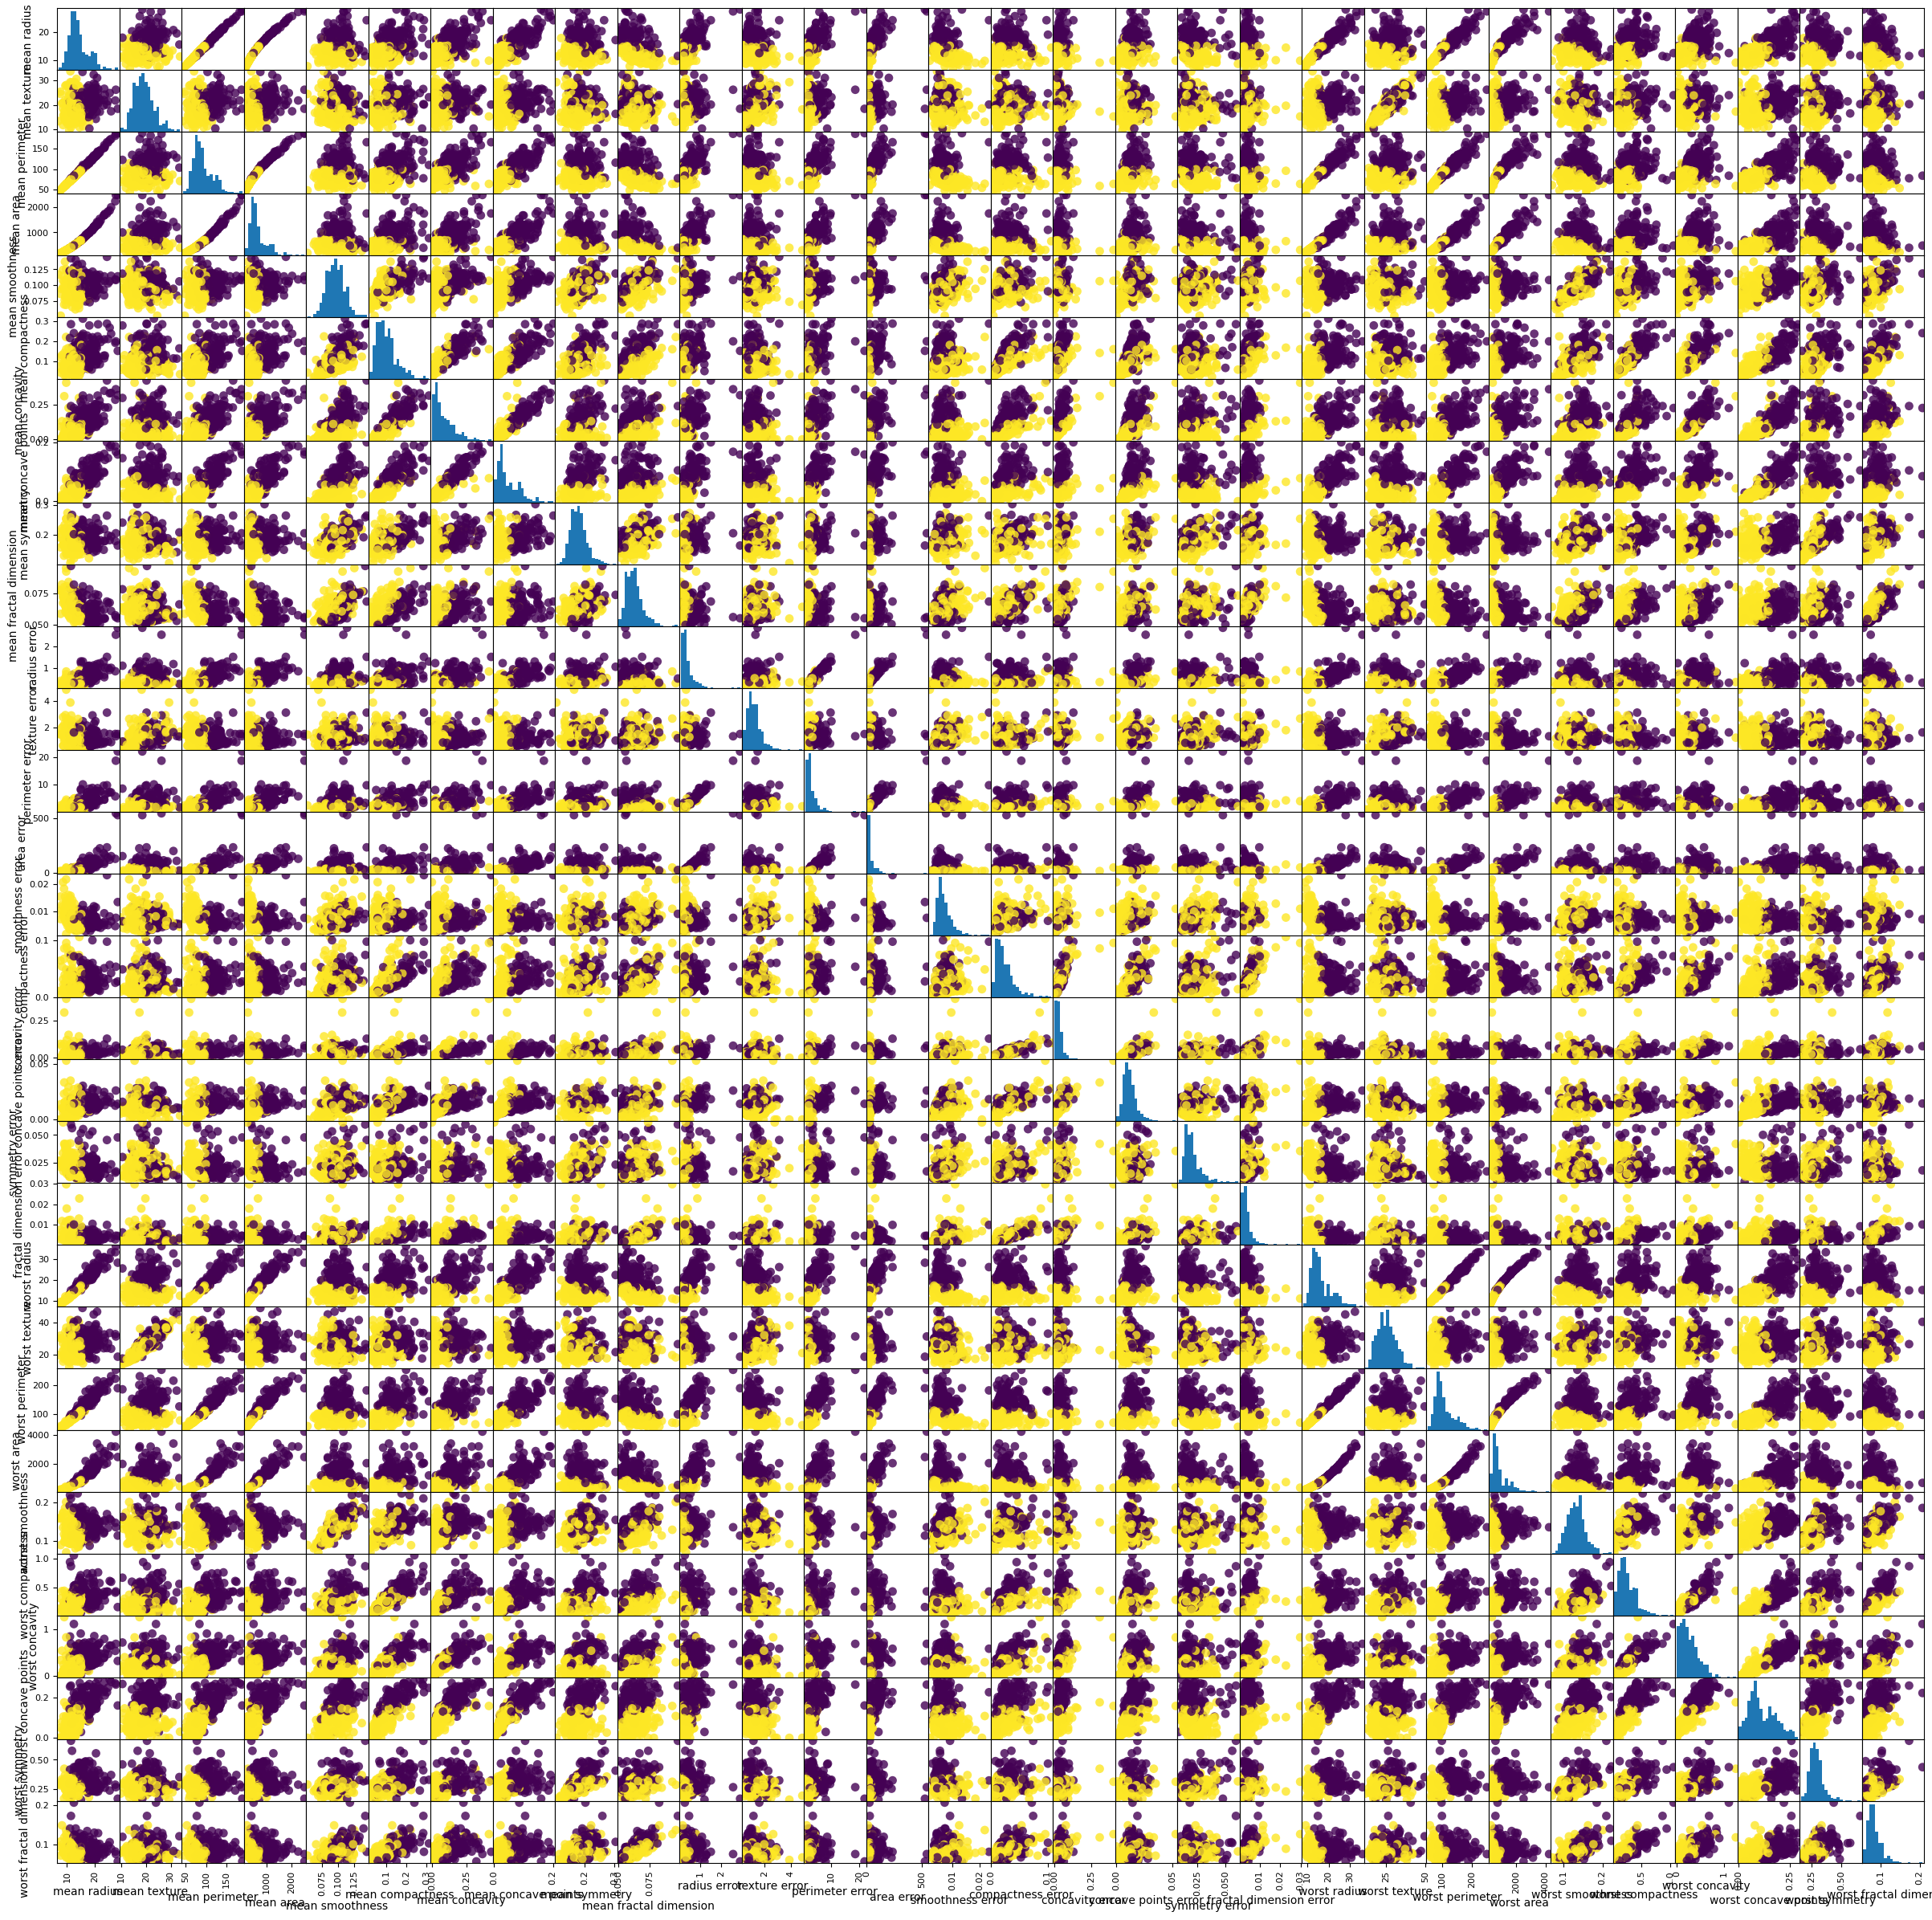

In [83]:
import pandas as pd

breast_cancer_dataframe = pd.DataFrame(X_train, columns=breast_cancer_dataset.feature_names)
grr = pd.plotting.scatter_matrix(breast_cancer_dataframe, c=y_train, figsize=(30, 30), marker='o', hist_kwds={'bins': 20}, s=60,
                                 alpha=.8)

матрица диаграмм рассеяния для признаков обучающего набора

## Построение модели методом k-ближайших средних

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Оценка качества модели

вычисляем правильность модели для тестового набора:

In [85]:
import numpy as np
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора:\n {}".format(y_pred))

Прогнозы для тестового набора:
 [1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


In [86]:
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred == y_test)))

Правильность на тестовом наборе: 0.92


In [87]:
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе: 0.92


## Вывод:

Была решена задача обучения с учителем.
Было два возможных вида рака груди висконсин(диагностический)
, что делало нашу задачу задачей 2-классовой классификации. 

Мы выбрали алгоритм классификации k ближайших соседей.
Эта модель даст правильные прогнозы в 92% случаев, что является хорошим результатом.